Student Number:

In [ ]:
!pip install -q cobra
try:
  import straindesign
except ImportError:
  !pip install straindesign

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.0/142.0 kB 13.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 50.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.4/116.4 kB 11.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.9/76.9 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 6.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.7/526.7 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 23.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.3/465.3 kB 41.7 MB/s eta 0:00:00


In [ ]:
import cobra
import logging
import numpy as np
from tqdm import tqdm
import straindesign as sd
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
iml = cobra.io.load_model('iML1515') # load the E. coli model (iML1515)

Output()

In [ ]:
#check existing metabolites
display([(metabolite.formula,metabolite.id,metabolite.name) for metabolite in iml.metabolites if (metabolite.name.startswith('') and metabolite.id.startswith('succ_c') and metabolite.formula.startswith('') and '' in metabolite.name)])

[('C4H4O4', 'succ_c', 'Succinate')]

In [ ]:
#check existing reactions
display([(reaction.id, reaction.name, reaction.reaction) for reaction in iml.reactions if (reaction.name.startswith('') and reaction.id.startswith('') and 'NAD' in reaction.name)])

[('ICDHyr',
  'Isocitrate dehydrogenase (NADP)',
  'icit_c + nadp_c <=> akg_c + co2_c + nadph_c'),
 ('ME1', 'Malic enzyme (NAD)', 'mal__L_c + nad_c --> co2_c + nadh_c + pyr_c'),
 ('SHCHD2',
  'Sirohydrochlorin dehydrogenase (NAD)',
  'dscl_c + nad_c --> h_c + nadh_c + scl_c'),
 ('ALDD2y',
  'Aldehyde dehydrogenase (acetaldehyde, NADP)',
  'acald_c + h2o_c + nadp_c --> ac_c + 2.0 h_c + nadph_c'),
 ('NADH9',
  'NADH dehydrogenase (demethylmenaquinone-8 & 0 protons)',
  '2dmmq8_c + h_c + nadh_c --> 2dmmql8_c + nad_c'),
 ('NADH10',
  'NADH dehydrogenase (menaquinone-8 & 0 protons)',
  'h_c + mqn8_c + nadh_c --> mql8_c + nad_c'),
 ('SSALx',
  'Succinate-semialdehyde dehydrogenase (NAD)',
  'h2o_c + nad_c + sucsal_c --> 2.0 h_c + nadh_c + succ_c'),
 ('NADDP', 'NAD diphosphatase', 'h2o_c + nad_c --> amp_c + 2.0 h_c + nmn_c'),
 ('NADK', 'NAD kinase', 'atp_c + nad_c --> adp_c + h_c + nadp_c'),
 ('ALDD4',
  'Aldehyde dehydrogenase (butanal, NAD)',
  'btal_c + h2o_c + nad_c --> but_c + 2.0 h_c + 

***rGlyP Pathway***

Reactions:

1. (CdS-CNT) CO2 + H2 -> CH2O2
2. (MeFtfL) CH2O2 + THF + ATP <-> ADP + Pi* + 10-formyl-THF
3. (MeFch) 10-formyl-THF <-> H2O + 5,10-methenyl-THF
4. (MeMdtA) 5,10-methenyl-THF + 2 NADPH <-> 2 NADP<sup>+</sup> + 5,10-methylene-THF
5. (EcGcvT/P/H) 5,10-methylene-THF + CO2 + NH3 + 2 NADH <-> 2 NAD<sup>+</sup> + THF + glycine
6. (EcGlyA) glycine + 5,10-methylene-THF + H2O <-> THF + l-serine
7. (MeSdaA) l-serine <-> NH3 + pyruvate
8. (MeLdhA) pyruvate + 2 NADH <-> 2 NAD<sup>+</sup> + lactate

Metabolites:

*  CO2 -- in the model
*  H2 -- in the model
*  ATP -- in the model
*  ADP -- in the model
*  NADPH -- in the model
*  NADP<sup>+</sup> -- in the model
*  NADH -- in the model
*  NAD<sup>+</sup> -- in the model
*  pyruvate -- in the model
*  NH3: Ammonia
*  C3H7NO3: L-serine -- in the model
*  CH2O2: Formic acid
*  H2O4P: Pi*/Phosphate (dihydrogen)
*  C19H23N7O6: THF/Tetrahydrofolic acid
*  C20H23N7O7: 10-formyl-THF/10-Formyltetrahydrofolate
*  C20H21N7O6: 5,10-methenyl-THF/5,10-Methenyltetrahydrofolate
*  C20H23N7O6: 5,10-methylene-THF/5,10-Methylenetetrahydrofolate
*  C2H5NO2: Glycine -- in the model
*  C3H6O3: Lactate -- in the model ('lac__L_c')

In [ ]:
cobra.core.configuration.solver = 'cplex'

#Create copy of model to which pathway will be added
imlc = iml.copy()

#add metabolites
imlc.add_metabolites(cobra.Metabolite('nh3_c',formula='NH3',name='Ammonia NH3',compartment='c'))
imlc.add_metabolites(cobra.Metabolite('ch2o2_c',formula='CH2O2',name='Formic acid CH2O2',compartment='c'))
# imlc.add_metabolites(cobra.Metabolite('pih2_c',formula='H2O4P',name='Phosphate dihydrogen H2O4P',compartment='c'))
imlc.add_metabolites(cobra.Metabolite('thf0_c',formula='C19H23N7O6',name='Tetrahydrofolic acid C19H23N7O6',compartment='c'))
imlc.add_metabolites(cobra.Metabolite('thff10_c',formula='C20H23N7O7',name='10-Formyltetrahydrofolate C20H23N7O7',compartment='c'))
imlc.add_metabolites(cobra.Metabolite('thfy510_c',formula='C20H21N7O6',name='5,10-Methenyltetrahydrofolate C20H21N7O6',compartment='c'))
imlc.add_metabolites(cobra.Metabolite('thfn510_c',formula='C20H23N7O6',name='5,10-Methylenetetrahydrofolate C20H23N7O6',compartment='c'))
# imlc.add_metabolites(cobra.Metabolite('lact_e',formula='C3H6O3',name='Lactate C3H6O3',compartment='e')) # taking out (the product)

#Create reactions
CdSCNT     = cobra.Reaction('CdSCNT')
MeFtfL     = cobra.Reaction('MeFtfL')
MeFch      = cobra.Reaction('MeFch')
MeMdtA     = cobra.Reaction('MeMdtA')
EcGcvTPH   = cobra.Reaction('EcGcvTPH')
EcGlyA     = cobra.Reaction('EcGlyA')
MeSdaA     = cobra.Reaction('MeSdaA')
MeLdhA     = cobra.Reaction('MeLdhA')
NADHsup    = cobra.Reaction('NADHsup') # need nadh_c
NADPHsup   = cobra.Reaction('NADPHsup') # need nadph_c
# EX_lact_e  = cobra.Reaction('EX_lact_e')
# EX_ch2o2_e = cobra.Reaction('EX_ch2o2_e')


#Add reactions to model
imlc.add_reactions([CdSCNT,
                    MeFtfL,
                    MeFch,
                    MeMdtA,
                    EcGcvTPH,
                    EcGlyA,
                    MeSdaA,
                    MeLdhA,
                    NADHsup,
                    NADPHsup])

#Define reaction equations
CdSCNT.reaction     = '1 co2_c + 1 h2_c                           -> 1 ch2o2_c' # CO2 + H2 -> CH2O2
MeFtfL.reaction     = '1 ch2o2_c + 1 thf0_c + 1 atp_c             -> 1 adp_c + 1 pi_c + 1 thff10_c' # CH2O2 + THF + ATP <-> ADP + Pi* + 10-formyl-THF (use normal Pi)
MeFch.reaction      = '1 thff10_c                                 -> 1 h2o_c + 1 thfy510_c' # 10-formyl-THF <-> H2O + 5,10-methenyl-THF
MeMdtA.reaction     = '1 thfy510_c + 2 nadph_c                    -> 2 nadp_c + 1 thfn510_c' # 5,10-methenyl-THF + 2 NADPH <-> 2 (NADP+) + 5,10-methylene-THF
EcGcvTPH.reaction   = '1 thfn510_c + 1 co2_c + 1 nh3_c + 2 nadh_c -> 2 nad_c + 1 thf0_c + 1 gly_c' # 5,10-methylene-THF + CO2 + NH3 + 2 NADH <-> 2 (NAD+) + THF + glycine
EcGlyA.reaction     = '1 gly_c + 1 thfn510_c + 1 h2o_c            -> 1 thf0_c + 1 ser__L_c' # glycine + 5,10-methylene-THF + H2O <-> THF + l-serine
MeSdaA.reaction     = '1 ser__L_c                                 -> 1 nh3_c + 1 pyr_c' # l-serine <-> NH3 + pyruvate
MeLdhA.reaction     = '1 pyr_c + 2 nadh_c                         -> 2 nad_c + 1 lac__L_c' # pyruvate + NADH <-> (NAD+) + lactate
# EX_lact_e.reaction  = '1 lact_e                                   ->'
# EX_ch2o2_e.reaction = '1 ch2o2_c                                  ->'
# NADHsup.reaction    = '1 nad_c + 1 h_c                            -> 1 nadh_c' # nadh supply
# NADPHsup.reaction   = '1 nadp_c + 1 h_c                           -> 1 nadph_c' # nadph supply
NADHsup.reaction    = 'btal_c + h2o_c + nad_c --> but_c + 2.0 h_c + nadh_c'
NADPHsup.reaction   = 'h2o_c + nadp_c + sucsal_c --> 2.0 h_c + nadph_c + succ_c'

#Set reaction bounds
reaction_ids = ['CdSCNT','MeFtfL','MeFch','MeMdtA','EcGcvTPH','EcGlyA','MeSdaA','MeLdhA','NADHsup','NADPHsup'] # set reactions bounds
for reaction_id in reaction_ids:
  imlc.reactions.get_by_id(reaction_id).lower_bound = -1000
  imlc.reactions.get_by_id(reaction_id).upper_bound = 1000

# imlc.reactions.get_by_id('EX_lac__L_e').lower_bound = -60
# imlc.reactions.get_by_id('EX_lac__L_e').upper_bound = -60

imlc.reactions.get_by_id('EX_co2_e').lower_bound = -1000
imlc.reactions.get_by_id('EX_co2_e').upper_bound = 1000

imlc.reactions.get_by_id('EX_h2_e').lower_bound = -1000
imlc.reactions.get_by_id('EX_h2_e').upper_bound = 1000

imlc.reactions.get_by_id('EX_glc__D_e').lower_bound = 0
imlc.reactions.get_by_id('EX_glc__D_e').upper_bound = 0

imlc.reactions.get_by_id('BIOMASS_Ec_iML1515_WT_75p37M').lower_bound = 0 # https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1008528
imlc.reactions.get_by_id('BIOMASS_Ec_iML1515_WT_75p37M').upper_bound = 0

# imlc.reactions.get_by_id('EX_ch2o2_e').lower_bound = -1000
# imlc.reactions.get_by_id('EX_ch2o2_e').upper_bound = 0

#Verify that pathway is operational
sol = sd.fba(imlc,obj='EX_lac__L_e',obj_sense='max') # EX_lac__L_e
print(f"Maximum possible lactate synthesis rate: {sol.objective_value}.")

Maximum possible lactate synthesis rate: 38.197692307693.


Max biomass generation: 2.246958404667

Max lactate synthesis: 38.197692307693

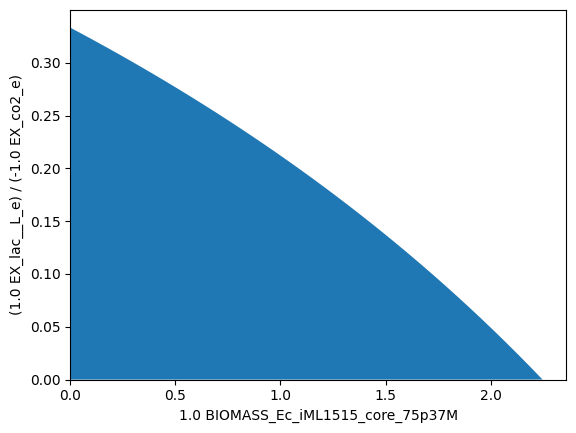

In [ ]:
sd.plot_flux_space(imlc, ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e'))); # ('EX_lact_e','-EX_glc__D_e')

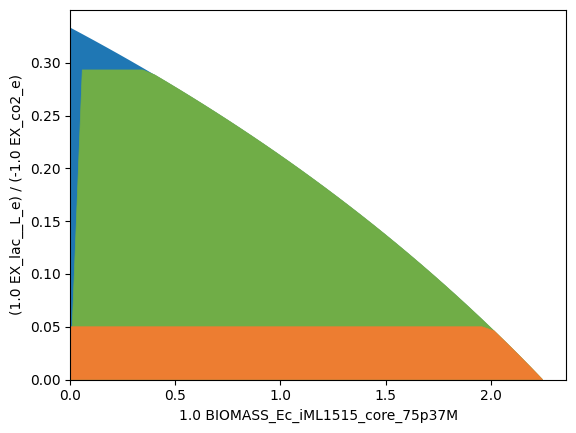

In [ ]:
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(imlc,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               show=False);
_,          _,      plot2 = sd.plot_flux_space(imlc,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               constraints='BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_lac__L_e >= 0',
                                               show=False);
plot2.set_facecolor('#70AD47')
plot2.set_edgecolor('#70AD47')
# pGCP design plot
_,          _,      plot3 = sd.plot_flux_space(imlc,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               # The sign of the glucose exchange reaction is flipped since
                                               # reaction is defined in the direction of secretion.
                                               constraints='EX_lac__L_e + 0.05 EX_co2_e <= 0', # EX_lact_e + 0.3 EX_glc__D_e <= 0
                                               show=False);
plot3.set_facecolor('#ED7D31')
plot3.set_edgecolor('#ED7D31')
# adjust axes limits and show plot
plot3.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot3.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

In [ ]:
module_suppress = sd.SDModule(imlc,sd.names.SUPPRESS,constraints='EX_lac__L_e + 0.05 EX_co2_e <= 0') # EX_lact_e + 0.3 EX_glc__D_e <= 0
module_protect  = sd.SDModule(imlc,sd.names.PROTECT, constraints='BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_lac__L_e >= 0') # BIOMASS_Ec_iML1515_core_75p37M>=0.2
logging.basicConfig(level=logging.INFO)
# Compute strain designs
sols = sd.compute_strain_designs(imlc,
                                 time_limit = 1000,
                                 sd_modules = [module_suppress, module_protect],
                                 max_solutions = 1,
                                 max_cost = 200, # max knockouts
                                 solution_approach = sd.names.ANY)
# Print solutions
if sols.sd_cost and sols.sd_cost[0]:
  print(f"One compressed solution with cost {sols.sd_cost[0]} found and "+\
      f"expanded to {len(sols.reaction_sd)} solutions in the uncompressed netork.")
  print(f"Example knockout set: {[s for s in sols.reaction_sd[0]]}")
  knockout_list = [s for s in sols.reaction_sd[0]] # a list of knockout reactions
else:
  print("There's no knockout identified.")

There's no knockout identified.


In [ ]:
# # Wild-type plot
# datapoints, triang, plot1 = sd.plot_flux_space(imlc,
#                                                ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lact_e','-EX_glc__D_e')),
#                                                show=False);
# knockouts = [[{s:1.0},'=',0.0] for s in sols.reaction_sd[0]]
# _,          _,      plot2 = sd.plot_flux_space(imlc,
#                                                ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lact_e','-EX_glc__D_e')),
#                                                # The sign of the glucose exchange reaction is flipped since
#                                                # reaction is defined in the direction of secretion.
#                                                constraints=knockouts,
#                                                show=False);
# plot2.set_facecolor('#FFC000')
# plot2.set_edgecolor('#FFC000')
# # adjust axes limits and show plot
# plot2.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
# plot2.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
# plt.show()

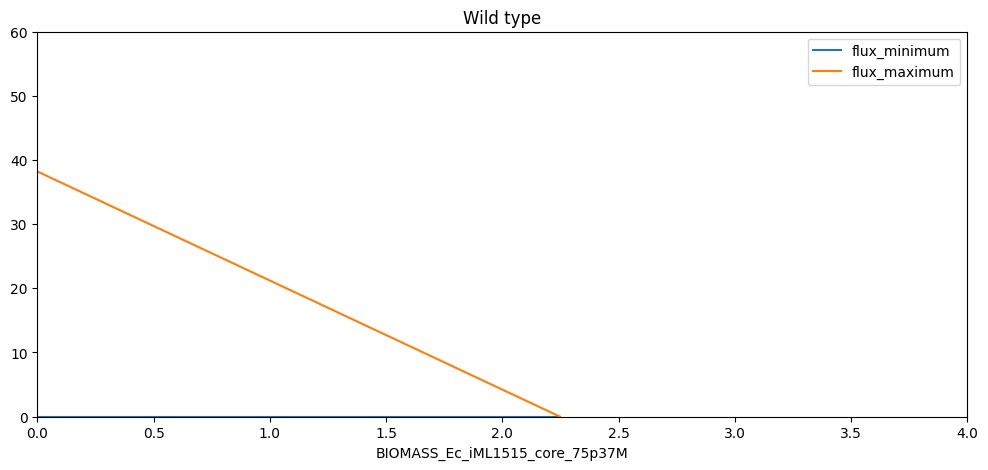

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

# imlc.reactions.EX_o2_e.lower_bound = 0
# imlc.reactions.EX_co2_e.lower_bound = -10

prod_env = cobra.flux_analysis.production_envelope(
    imlc, ["BIOMASS_Ec_iML1515_core_75p37M"], objective="EX_lac__L_e", carbon_sources="EX_co2_e"
)

prod_env.plot(kind='line', x='BIOMASS_Ec_iML1515_core_75p37M', y=['flux_minimum', 'flux_maximum'], ax=ax1)
ax1.set_xlim(0,4)
ax1.set_ylim(0,60)
ax1.set_title('Wild type')

# ecc_copy = imlc.copy()
# ecc_copy.reactions.EX_o2_e.lower_bound = 0
# ecc_copy.reactions.EX_co2_e.lower_bound = -20

# for s in sols.reaction_sd[0]:
#   ecc_copy.reactions.get_by_id(s).knock_out()
# prod_env = cobra.flux_analysis.production_envelope(
#     ecc_copy, ["BIOMASS_Ec_iML1515_core_75p37M"], objective="EX_lact_e", carbon_sources="EX_glc__D_e"
# )
# prod_env.plot(kind='line', x='BIOMASS_Ec_iML1515_core_75p37M', y=['flux_minimum', 'flux_maximum'], ax=ax2)
# ax2.set_xlim(0, 1)
# ax2.set_ylim(0,20)
# ax2.set_title('Mutation')

plt.show()

***SACA Pathway***

Reactions:
1. (ZnO) CO2 + 3 H2 -> methanol + H2O
2. (AOX) 2 methanol + O2 -> 2 formaldehyde + 2 H2O
3. (GALS) 2 formaldehyde <-> glycolaldehyde
4. (ACPS) glycolaldehyde + Pi <-> acetyl-phosphate + H2O
5. (PTA) acetyl-phosphate + CoA <-> acetyl-CoA + Pi

Metabolites:
*  CO2 -- in the model
*  O2 -- in the model
*  H2 -- in the model
*  Acetyl-CoA -- in the model ('accoa_c')
*  HO4P: Pi/Phosphate -- in the model
*  Methanol -- in the model
*  Formaldehyde -- in the model
*  Glycolaldehyde -- in the model
*  Acetyl-phosphate -- in the model
*  CoA/Coenzyme-A -- in the model

(aim to produce Acetyl-CoA to generate the fatty acid, dodecanoate, 'ddca_c')

ddcacoa_c:
*  ('ACOAD5f') ddcacoa_c + fad_c ⇌ dd2coa_c + fadh2_c
*  ('ACACT6r') accoa_c + ddcacoa_c ⇌ 3otdcoa_c + coa_c
*  ('FACOAE120') ddcacoa_c + h2o_c → coa_c + ddca_c + h_c
*  ('FACOAL120t2pp') atp_c + coa_c + ddca_p + h_p → amp_c + ddcacoa_c + h_c + ppi_c

In [ ]:
#Create copy of model to which pathway will be added
imlc2 = iml.copy()

#Create reactions
ZnO      = cobra.Reaction('ZnO')
AOX      = cobra.Reaction('AOX')
GALS     = cobra.Reaction('GALS')
ACPS     = cobra.Reaction('ACPS')
PTAg     = cobra.Reaction('PTAg')
# NADHsup  = cobra.Reaction('NADHsup')
# NADPHsup = cobra.Reaction('NADPHsup')

#Add reactions to model
imlc2.add_reactions([ZnO,
                     AOX,
                     GALS,
                     ACPS,
                     PTAg])

# imlc2.add_reactions([ZnO,
#                      AOX,
#                      GALS,
#                      ACPS,
#                      PTAg,
#                      NADHsup,
#                      NADPHsup])

#Define reaction equations
ZnO.reaction        = '1 co2_c + 3 h2_c                   -> 1 meoh_c + 1 h2o_c' # CO2 + 3 H2 -> methanol + H2O
AOX.reaction        = '2 meoh_c + 1 o2_c                  -> 2 fald_c + 2 h2o_c' # 2 methanol + O2 -> 2 formaldehyde + 2 H2O
GALS.reaction       = '2 fald_c                           -> 1 gcald_c' # 2 formaldehyde <-> glycolaldehyde
ACPS.reaction       = '1 gcald_c + 1 pi_c                 -> 1 actp_c + 1 h2o_c' # glycolaldehyde + Pi <-> acetyl-phosphate + H2O
PTAg.reaction       = '1 actp_c + 1 coa_c                 -> 1 accoa_c + 1 pi_c' # acetyl-phosphate + CoA <-> acetyl-CoA + Pi
# NADHsup.reaction    = '1 nad_c + 1 h_c                    -> 1 nadh_c' # nadh supply
# NADPHsup.reaction   = '1 nadp_c + 1 h_c                   -> 1 nadph_c' # nadph supply

#Set reaction bounds
# reaction_ids = ['ZnO','AOX','GALS','ACPS','PTAg','NADHsup','NADPHsup'] # set reactions bounds
reaction_ids = ['ZnO','AOX','GALS','ACPS','PTAg'] # set reactions bounds
for reaction_id in reaction_ids:
  imlc2.reactions.get_by_id(reaction_id).lower_bound = 0
  imlc2.reactions.get_by_id(reaction_id).upper_bound = 1000

imlc2.reactions.get_by_id('EX_o2_e').lower_bound = -1000
imlc2.reactions.get_by_id('EX_o2_e').upper_bound = 1000

imlc2.reactions.get_by_id('EX_co2_e').lower_bound = -1000
imlc2.reactions.get_by_id('EX_co2_e').upper_bound = 1000

imlc2.reactions.get_by_id('EX_h2_e').lower_bound = -1000
imlc2.reactions.get_by_id('EX_h2_e').upper_bound = 1000

imlc2.reactions.get_by_id('EX_glc__D_e').lower_bound = 0
imlc2.reactions.get_by_id('EX_glc__D_e').upper_bound = 0

imlc2.reactions.get_by_id('DDCAtexi').lower_bound = -1000 # ddca_e -> ddca_p
imlc2.reactions.get_by_id('DDCAtexi').upper_bound = 1000

imlc2.reactions.get_by_id('FACOAL120t2pp').lower_bound = -1000 # atp_c + coa_c + ddca_p + h_p → amp_c + ddcacoa_c + h_c + ppi_c
imlc2.reactions.get_by_id('FACOAL120t2pp').upper_bound = 1000

imlc2.reactions.get_by_id('ACACT6r').lower_bound = -1000 # accoa_c + ddcacoa_c ⇌ 3otdcoa_c + coa_c
imlc2.reactions.get_by_id('ACACT6r').upper_bound = 1000

imlc2.reactions.get_by_id('ACOAD5f').lower_bound = -1000 # ddcacoa_c + fad_c ⇌ dd2coa_c + fadh2_c
imlc2.reactions.get_by_id('ACOAD5f').upper_bound = 1000

imlc2.reactions.get_by_id('FACOAE120').lower_bound = -1000 # ddcacoa_c + h2o_c → coa_c + ddca_c + h_c
imlc2.reactions.get_by_id('FACOAE120').upper_bound = 1000

imlc2.reactions.get_by_id('BIOMASS_Ec_iML1515_WT_75p37M').lower_bound = 0 # https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1008528
imlc2.reactions.get_by_id('BIOMASS_Ec_iML1515_WT_75p37M').upper_bound = 0

#Verify that pathway is operational
sol = sd.fba(imlc2,obj='EX_ddca_e',obj_sense='max') # FACOAE120, EX_ddca_e, BIOMASS_Ec_iML1515_core_75p37M
print(f"Maximum possible dodecanoate synthesis rate: {sol.objective_value}.")

Maximum possible dodecanoate synthesis rate: 18.718366445917.


Max biomass generation: 4.807258094582

Max dodecanoate synthesis: 18.718366445917


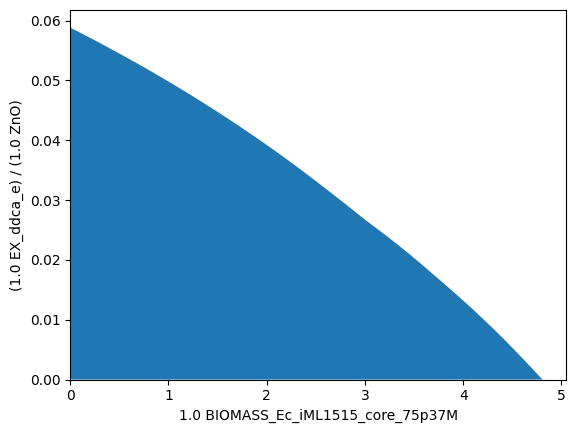

In [ ]:
sd.plot_flux_space(imlc2, ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','ZnO'))); # ('EX_Lac__L_e','-EX_glc__D_e')

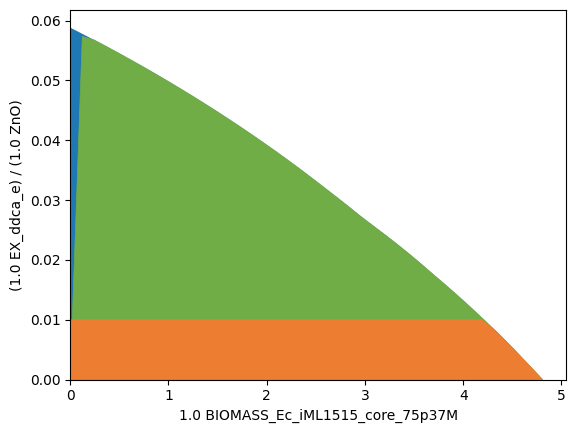

In [ ]:
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(imlc2,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','ZnO')), # 'EX_lact_e','-EX_glc__D_e'
                                               show=False);
_,          _,      plot2 = sd.plot_flux_space(imlc2,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','ZnO')), # 'EX_lact_e','-EX_glc__D_e'
                                               constraints='BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_ddca_e >= 0',
                                               show=False);
plot2.set_facecolor('#70AD47')
plot2.set_edgecolor('#70AD47')
# pGCP design plot
_,          _,      plot3 = sd.plot_flux_space(imlc2,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','ZnO')), # 'EX_lact_e','-EX_glc__D_e'
                                               # The sign of the glucose exchange reaction is flipped since
                                               # reaction is defined in the direction of secretion.
                                               constraints='EX_ddca_e - 0.01 ZnO <= 0', # EX_lact_e + 0.3 EX_glc__D_e <= 0
                                               show=False);
plot3.set_facecolor('#ED7D31')
plot3.set_edgecolor('#ED7D31')
# adjust axes limits and show plot
plot3.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot3.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

In [ ]:
module_suppress = sd.SDModule(imlc2,sd.names.SUPPRESS,constraints='EX_ddca_e - 0.01 ZnO <= 0') # EX_lact_e + 0.3 EX_glc__D_e <= 0
module_protect  = sd.SDModule(imlc2,sd.names.PROTECT, constraints='BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_ddca_e >= 0') # BIOMASS_Ec_iML1515_core_75p37M>=0.2
logging.basicConfig(level=logging.INFO)
# Compute strain designs
sols = sd.compute_strain_designs(imlc2,
                                 time_limit = 1000,
                                 sd_modules = [module_suppress, module_protect],
                                 max_solutions = 1,
                                 max_cost = 200, # max knockouts
                                 solution_approach = sd.names.ANY)
# Print solutions
if sols.sd_cost and sols.sd_cost[0]:
  print(f"One compressed solution with cost {sols.sd_cost[0]} found and "+\
      f"expanded to {len(sols.reaction_sd)} solutions in the uncompressed netork.")
  print(f"Example knockout set: {[s for s in sols.reaction_sd[0]]}")
  knockout_list = [s for s in sols.reaction_sd[0]] # a list of knockout reactions
else:
  print("There's no knockout identified.")

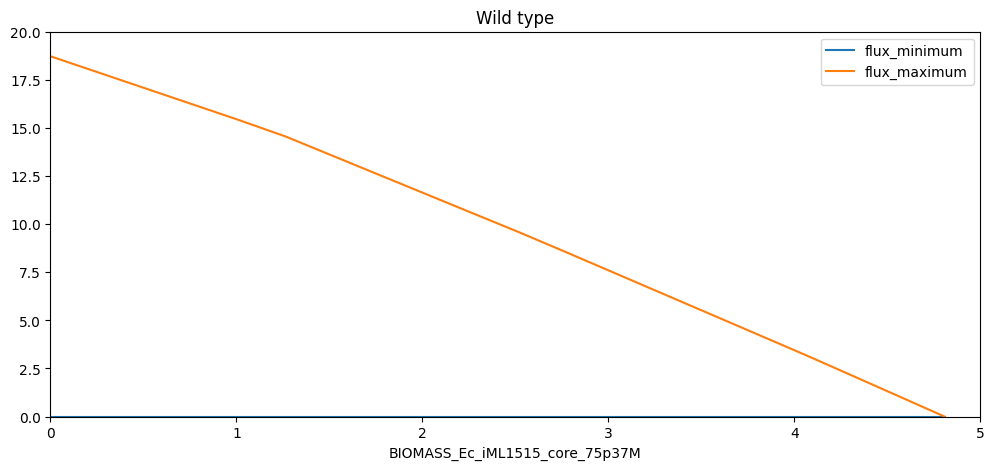

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

# imlc2.reactions.EX_o2_e.lower_bound = 0
# imlc2.reactions.EX_co2_e.lower_bound = -20

prod_env = cobra.flux_analysis.production_envelope(
    imlc2, ["BIOMASS_Ec_iML1515_core_75p37M"], objective="EX_ddca_e", carbon_sources="ZnO"
)

prod_env.plot(kind='line', x='BIOMASS_Ec_iML1515_core_75p37M', y=['flux_minimum', 'flux_maximum'], ax=ax1)
ax1.set_xlim(0, 5)
ax1.set_ylim(0,20)
ax1.set_title('Wild type')

# ecc_copy = imlc.copy()
# ecc_copy.reactions.EX_o2_e.lower_bound = 0
# ecc_copy.reactions.EX_co2_e.lower_bound = -20

# for s in sols.reaction_sd[0]:
#   ecc_copy.reactions.get_by_id(s).knock_out()
# prod_env = cobra.flux_analysis.production_envelope(
#     ecc_copy, ["BIOMASS_Ec_iML1515_core_75p37M"], objective="EX_lact_e", carbon_sources="EX_glc__D_e"
# )
# prod_env.plot(kind='line', x='BIOMASS_Ec_iML1515_core_75p37M', y=['flux_minimum', 'flux_maximum'], ax=ax2)
# ax2.set_xlim(0, 1)
# ax2.set_ylim(0,20)
# ax2.set_title('Mutation')

plt.show()

***rGlyP and SACA***

In [ ]:
#Create copy of model to which pathway will be added
imlc3 = iml.copy()

#add metabolites
imlc3.add_metabolites(cobra.Metabolite('nh3_c',formula='NH3',name='Ammonia NH3',compartment='c'))
imlc3.add_metabolites(cobra.Metabolite('ch2o2_c',formula='CH2O2',name='Formic acid CH2O2',compartment='c'))
imlc3.add_metabolites(cobra.Metabolite('thf0_c',formula='C19H23N7O6',name='Tetrahydrofolic acid C19H23N7O6',compartment='c'))
imlc3.add_metabolites(cobra.Metabolite('thff10_c',formula='C20H23N7O7',name='10-Formyltetrahydrofolate C20H23N7O7',compartment='c'))
imlc3.add_metabolites(cobra.Metabolite('thfy510_c',formula='C20H21N7O6',name='5,10-Methenyltetrahydrofolate C20H21N7O6',compartment='c'))
imlc3.add_metabolites(cobra.Metabolite('thfn510_c',formula='C20H23N7O6',name='5,10-Methylenetetrahydrofolate C20H23N7O6',compartment='c'))

#Create reactions
CdSCNT     = cobra.Reaction('CdSCNT')
MeFtfL     = cobra.Reaction('MeFtfL')
MeFch      = cobra.Reaction('MeFch')
MeMdtA     = cobra.Reaction('MeMdtA')
EcGcvTPH   = cobra.Reaction('EcGcvTPH')
EcGlyA     = cobra.Reaction('EcGlyA')
MeSdaA     = cobra.Reaction('MeSdaA')
MeLdhA     = cobra.Reaction('MeLdhA')
NADHsup    = cobra.Reaction('NADHsup') # need nadh_c
NADPHsup   = cobra.Reaction('NADPHsup') # need nadph_c
ZnO        = cobra.Reaction('ZnO')
AOX        = cobra.Reaction('AOX')
GALS       = cobra.Reaction('GALS')
ACPS       = cobra.Reaction('ACPS')
PTAg       = cobra.Reaction('PTAg')

#Add reactions to model
imlc3.add_reactions([CdSCNT,
                     MeFtfL,
                     MeFch,
                     MeMdtA,
                     EcGcvTPH,
                     EcGlyA,
                     MeSdaA,
                     MeLdhA,
                     NADHsup,
                     NADPHsup,
                     ZnO,
                     AOX,
                     GALS,
                     ACPS,
                     PTAg])

#Define reaction equations
CdSCNT.reaction     = '1 co2_c + 1 h2_c                           -> 1 ch2o2_c' # CO2 + H2 -> CH2O2
MeFtfL.reaction     = '1 ch2o2_c + 1 thf0_c + 1 atp_c             -> 1 adp_c + 1 pi_c + 1 thff10_c' # CH2O2 + THF + ATP <-> ADP + Pi* + 10-formyl-THF (use normal Pi)
MeFch.reaction      = '1 thff10_c                                 -> 1 h2o_c + 1 thfy510_c' # 10-formyl-THF <-> H2O + 5,10-methenyl-THF
MeMdtA.reaction     = '1 thfy510_c + 2 nadph_c                    -> 2 nadp_c + 1 thfn510_c' # 5,10-methenyl-THF + 2 NADPH <-> 2 (NADP+) + 5,10-methylene-THF
EcGcvTPH.reaction   = '1 thfn510_c + 1 co2_c + 1 nh3_c + 2 nadh_c -> 2 nad_c + 1 thf0_c + 1 gly_c' # 5,10-methylene-THF + CO2 + NH3 + 2 NADH <-> 2 (NAD+) + THF + glycine
EcGlyA.reaction     = '1 gly_c + 1 thfn510_c + 1 h2o_c            -> 1 thf0_c + 1 ser__L_c' # glycine + 5,10-methylene-THF + H2O <-> THF + l-serine
MeSdaA.reaction     = '1 ser__L_c                                 -> 1 nh3_c + 1 pyr_c' # l-serine <-> NH3 + pyruvate
MeLdhA.reaction     = '1 pyr_c + 2 nadh_c                         -> 2 nad_c + 1 lac__L_c' # pyruvate + NADH <-> (NAD+) + lactate
NADHsup.reaction    = 'btal_c + h2o_c + nad_c --> but_c + 2.0 h_c + nadh_c'
NADPHsup.reaction   = 'h2o_c + nadp_c + sucsal_c --> 2.0 h_c + nadph_c + succ_c'
ZnO.reaction        = '1 co2_c + 3 h2_c                   -> 1 meoh_c + 1 h2o_c' # CO2 + 3 H2 -> methanol + H2O
AOX.reaction        = '2 meoh_c + 1 o2_c                  -> 2 fald_c + 2 h2o_c' # 2 methanol + O2 -> 2 formaldehyde + 2 H2O
GALS.reaction       = '2 fald_c                           -> 1 gcald_c' # 2 formaldehyde <-> glycolaldehyde
ACPS.reaction       = '1 gcald_c + 1 pi_c                 -> 1 actp_c + 1 h2o_c' # glycolaldehyde + Pi <-> acetyl-phosphate + H2O
PTAg.reaction       = '1 actp_c + 1 coa_c                 -> 1 accoa_c + 1 pi_c' # acetyl-phosphate + CoA <-> acetyl-CoA + Pi

#Set reaction bounds
reaction_ids1 = ['CdSCNT','MeFtfL','MeFch','MeMdtA','EcGcvTPH','EcGlyA','MeSdaA','MeLdhA','NADHsup','NADPHsup'] # set reactions bounds
for reaction_id1 in reaction_ids1:
  imlc3.reactions.get_by_id(reaction_id1).lower_bound = -1000
  imlc3.reactions.get_by_id(reaction_id1).upper_bound = 1000

# imlc3.reactions.get_by_id('EX_lac__L_e').lower_bound = -60
# imlc3.reactions.get_by_id('EX_lac__L_e').upper_bound = -60

imlc3.reactions.get_by_id('EX_co2_e').lower_bound = -1000
imlc3.reactions.get_by_id('EX_co2_e').upper_bound = 1000

imlc3.reactions.get_by_id('EX_h2_e').lower_bound = -1000
imlc3.reactions.get_by_id('EX_h2_e').upper_bound = 1000

imlc3.reactions.get_by_id('EX_glc__D_e').lower_bound = 0
imlc3.reactions.get_by_id('EX_glc__D_e').upper_bound = 0

# imlc3.reactions.get_by_id('EX_ch2o2_e').lower_bound = -1000
# imlc3.reactions.get_by_id('EX_ch2o2_e').upper_bound = 0

reaction_ids2 = ['ZnO','AOX','GALS','ACPS','PTAg'] # set reactions bounds
for reaction_id2 in reaction_ids2:
  imlc3.reactions.get_by_id(reaction_id2).lower_bound = 0
  imlc3.reactions.get_by_id(reaction_id2).upper_bound = 1000

imlc3.reactions.get_by_id('EX_o2_e').lower_bound = -1000
imlc3.reactions.get_by_id('EX_o2_e').upper_bound = 1000

imlc3.reactions.get_by_id('EX_co2_e').lower_bound = -1000
imlc3.reactions.get_by_id('EX_co2_e').upper_bound = 1000

imlc3.reactions.get_by_id('EX_h2_e').lower_bound = -1000
imlc3.reactions.get_by_id('EX_h2_e').upper_bound = 1000

imlc3.reactions.get_by_id('EX_glc__D_e').lower_bound = 0
imlc3.reactions.get_by_id('EX_glc__D_e').upper_bound = 0

imlc3.reactions.get_by_id('DDCAtexi').lower_bound = -1000 # ddca_e -> ddca_p
imlc3.reactions.get_by_id('DDCAtexi').upper_bound = 1000

imlc3.reactions.get_by_id('FACOAL120t2pp').lower_bound = -1000 # atp_c + coa_c + ddca_p + h_p → amp_c + ddcacoa_c + h_c + ppi_c
imlc3.reactions.get_by_id('FACOAL120t2pp').upper_bound = 1000

imlc3.reactions.get_by_id('ACACT6r').lower_bound = -1000 # accoa_c + ddcacoa_c ⇌ 3otdcoa_c + coa_c
imlc3.reactions.get_by_id('ACACT6r').upper_bound = 1000

imlc3.reactions.get_by_id('ACOAD5f').lower_bound = -1000 # ddcacoa_c + fad_c ⇌ dd2coa_c + fadh2_c
imlc3.reactions.get_by_id('ACOAD5f').upper_bound = 1000

imlc3.reactions.get_by_id('FACOAE120').lower_bound = -1000 # ddcacoa_c + h2o_c → coa_c + ddca_c + h_c
imlc3.reactions.get_by_id('FACOAE120').upper_bound = 1000

imlc3.reactions.get_by_id('BIOMASS_Ec_iML1515_WT_75p37M').lower_bound = 0 # https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1008528
imlc3.reactions.get_by_id('BIOMASS_Ec_iML1515_WT_75p37M').upper_bound = 0

#Verify that pathway is operational
sol = sd.fba(imlc3,obj='EX_ddca_e',obj_sense='max') # FACOAE120, EX_ddca_e, BIOMASS_Ec_iML1515_core_75p37M, EX_lac__L_e
print(f"Maximum possible lactate synthesis rate: {sol.objective_value}.")

Maximum possible lactate synthesis rate: 27.569863760218.


Max biomass generation: 6.579550744842

Max lactate synthesis: 169.385938566547

Max dodecanoate synthesis: 27.569863760218


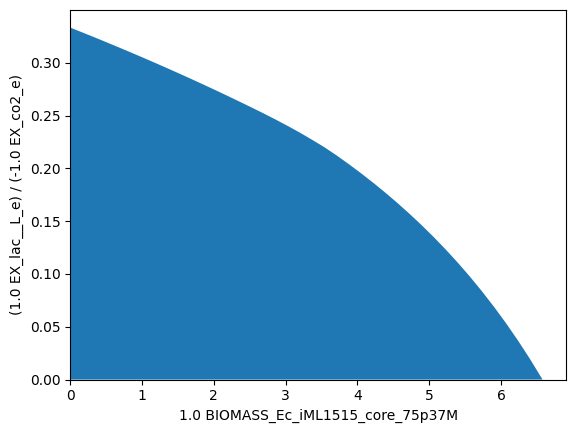

In [ ]:
sd.plot_flux_space(imlc3, ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e')));

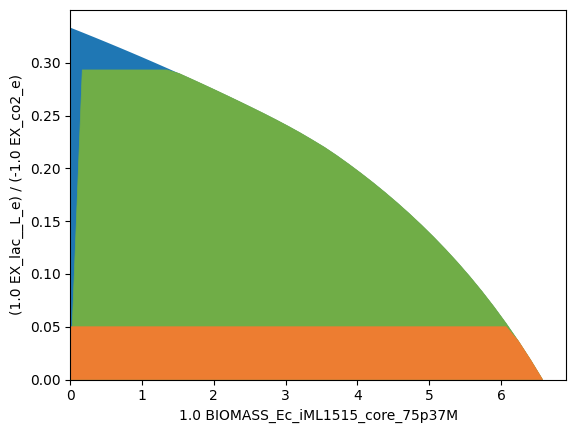

In [ ]:
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(imlc3,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               show=False);
_,          _,      plot2 = sd.plot_flux_space(imlc3,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               constraints='BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_lac__L_e >= 0',
                                               show=False);
plot2.set_facecolor('#70AD47')
plot2.set_edgecolor('#70AD47')
# pGCP design plot
_,          _,      plot3 = sd.plot_flux_space(imlc3,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_lac__L_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               # The sign of the glucose exchange reaction is flipped since
                                               # reaction is defined in the direction of secretion.
                                               constraints='EX_lac__L_e + 0.05 EX_co2_e <= 0', # EX_lact_e + 0.3 EX_glc__D_e <= 0
                                               show=False);
plot3.set_facecolor('#ED7D31')
plot3.set_edgecolor('#ED7D31')
# adjust axes limits and show plot
plot3.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot3.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

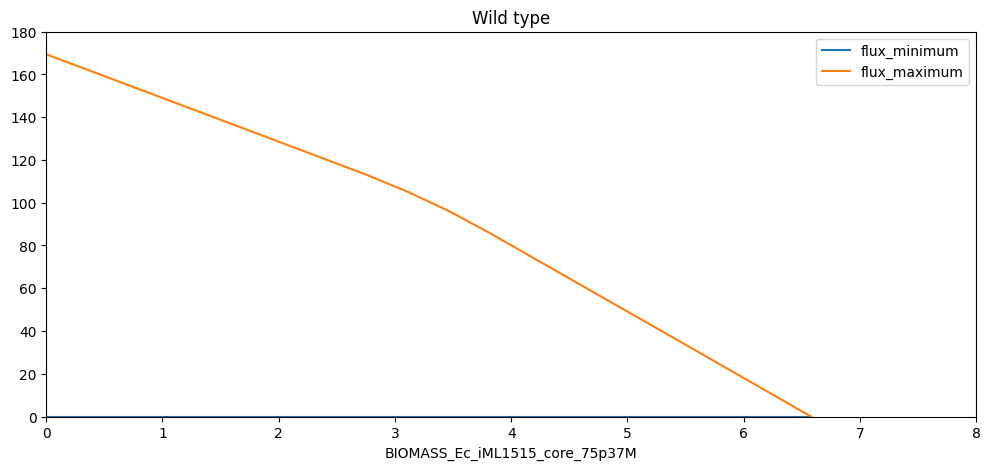

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

# imlc.reactions.EX_o2_e.lower_bound = 0
# imlc.reactions.EX_co2_e.lower_bound = -10

prod_env = cobra.flux_analysis.production_envelope(
    imlc3, ["BIOMASS_Ec_iML1515_core_75p37M"], objective="EX_lac__L_e", carbon_sources="EX_co2_e"
)

prod_env.plot(kind='line', x='BIOMASS_Ec_iML1515_core_75p37M', y=['flux_minimum', 'flux_maximum'], ax=ax1)
ax1.set_xlim(0,8)
ax1.set_ylim(0,180)
ax1.set_title('Wild type')


plt.show()

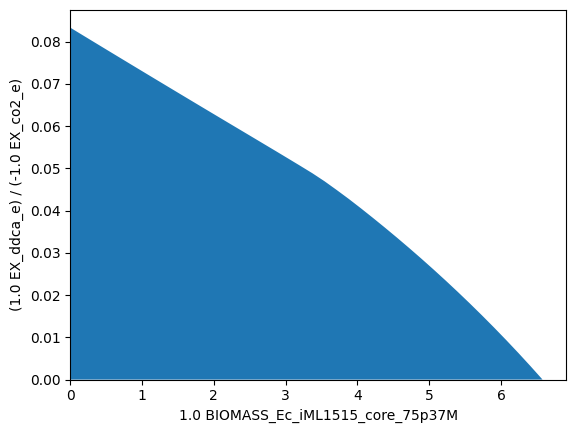

In [ ]:
sd.plot_flux_space(imlc3, ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','-EX_co2_e')));

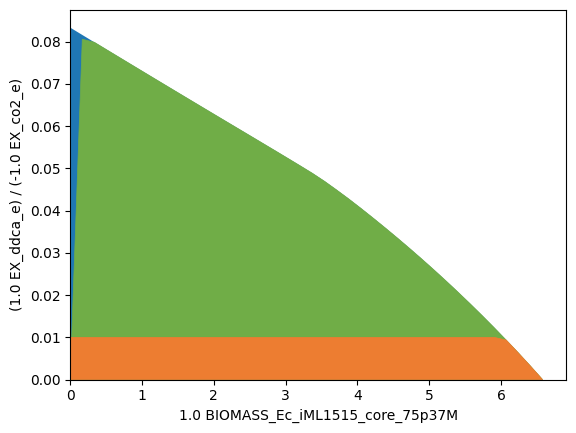

In [ ]:
# Wild-type plot
datapoints, triang, plot1 = sd.plot_flux_space(imlc3,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               show=False);
_,          _,      plot2 = sd.plot_flux_space(imlc3,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               constraints='BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_ddca_e >= 0',
                                               show=False);
plot2.set_facecolor('#70AD47')
plot2.set_edgecolor('#70AD47')
# pGCP design plot
_,          _,      plot3 = sd.plot_flux_space(imlc3,
                                               ('BIOMASS_Ec_iML1515_core_75p37M',('EX_ddca_e','-EX_co2_e')), # 'EX_lact_e','-EX_glc__D_e'
                                               # The sign of the glucose exchange reaction is flipped since
                                               # reaction is defined in the direction of secretion.
                                               constraints='EX_ddca_e + 0.01 EX_co2_e <= 0', # EX_lact_e + 0.3 EX_glc__D_e <= 0
                                               show=False);
plot3.set_facecolor('#ED7D31')
plot3.set_edgecolor('#ED7D31')
# adjust axes limits and show plot
plot3.axes.set_xlim(0, 1.05*max([a[0] for a in datapoints]))
plot3.axes.set_ylim(0, 1.05*max([a[1] for a in datapoints]))
plt.show()

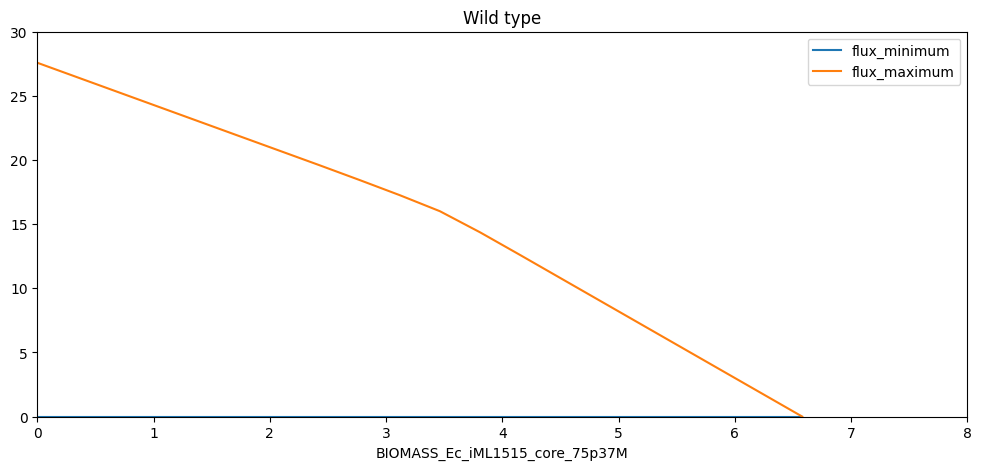

In [ ]:
f, (ax1) = plt.subplots(1, 1, figsize=(12, 5))

# imlc2.reactions.EX_o2_e.lower_bound = 0
# imlc2.reactions.EX_co2_e.lower_bound = -20

prod_env = cobra.flux_analysis.production_envelope(
    imlc3, ["BIOMASS_Ec_iML1515_core_75p37M"], objective="EX_ddca_e", carbon_sources="EX_co2_e"
)

prod_env.plot(kind='line', x='BIOMASS_Ec_iML1515_core_75p37M', y=['flux_minimum', 'flux_maximum'], ax=ax1)
ax1.set_xlim(0, 8)
ax1.set_ylim(0,30)
ax1.set_title('Wild type')


plt.show()

In [ ]:
module_suppress = sd.SDModule(imlc3,sd.names.SUPPRESS,constraints=['EX_lac__L_e + 0.05 EX_co2_e <= 0','EX_ddca_e + 0.01 EX_co2_e <= 0']) # EX_lact_e + 0.3 EX_glc__D_e <= 0
module_protect  = sd.SDModule(imlc3,sd.names.PROTECT, constraints=['BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_lac__L_e >= 0','BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_ddca_e >= 0']) # BIOMASS_Ec_iML1515_core_75p37M>=0.2
logging.basicConfig(level=logging.INFO)
# Compute strain designs
sols = sd.compute_strain_designs(imlc3,
                                 time_limit = 1000,
                                 sd_modules = [module_suppress, module_protect],
                                 max_solutions = 1,
                                 max_cost = 200, # max knockouts
                                 solution_approach = sd.names.ANY)
# Print solutions
if sols.sd_cost and sols.sd_cost[0]:
  print(f"One compressed solution with cost {sols.sd_cost[0]} found and "+\
      f"expanded to {len(sols.reaction_sd)} solutions in the uncompressed netork.")
  print(f"Example knockout set: {[s for s in sols.reaction_sd[0]]}")
  knockout_list = [s for s in sols.reaction_sd[0]] # a list of knockout reactions
else:
  print("There's no knockout identified.")

There's no knockout identified.


In [ ]:
# module_suppress = sd.SDModule(imlc3,sd.names.SUPPRESS,constraints='EX_ddca_e + 0.01 EX_co2_e <= 0') # EX_lact_e + 0.3 EX_glc__D_e <= 0
# module_protect  = sd.SDModule(imlc3,sd.names.PROTECT, constraints='BIOMASS_Ec_iML1515_core_75p37M - 0.01 EX_ddca_e >= 0') # BIOMASS_Ec_iML1515_core_75p37M>=0.2
# logging.basicConfig(level=logging.INFO)
# # Compute strain designs
# sols = sd.compute_strain_designs(imlc3,
#                                  time_limit = 1000,
#                                  sd_modules = [module_suppress, module_protect],
#                                  max_solutions = 1,
#                                  max_cost = 200, # max knockouts
#                                  solution_approach = sd.names.ANY)
# # Print solutions
# if sols.sd_cost and sols.sd_cost[0]:
#   print(f"One compressed solution with cost {sols.sd_cost[0]} found and "+\
#       f"expanded to {len(sols.reaction_sd)} solutions in the uncompressed netork.")
#   print(f"Example knockout set: {[s for s in sols.reaction_sd[0]]}")
#   knockout_list = [s for s in sols.reaction_sd[0]] # a list of knockout reactions
# else:
#   print("There's no knockout identified.")